In [317]:
import random
import math
import networkx as nx
from networkx.algorithms import bipartite
from IPython.display import display
import matplotlib.pyplot as plt

import sympy
import scipy
import numpy as np

# x, y, z = symbols('x y z')
sympy.init_printing(use_unicode=True)

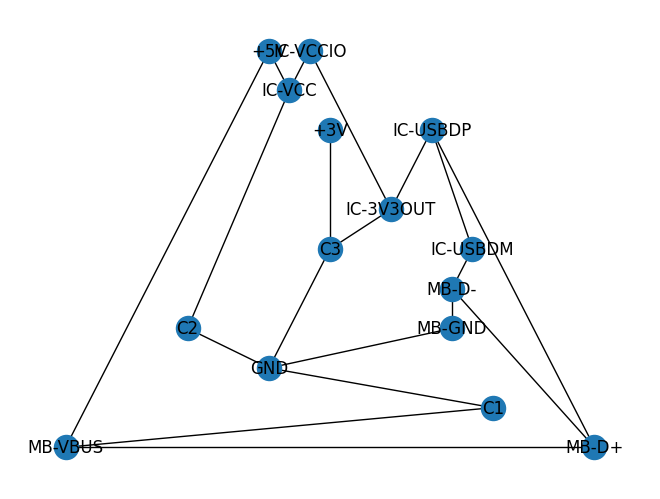

In [318]:
SIDE1 = nx.Graph()
SIDE1.add_nodes_from([
    'MB-VBUS',
    'MB-D+',
    'MB-D-',
    'MB-GND',
    '+5V',
    '+3V',
    'GND',
    'C1',
    'C2',
    'C3',
    'IC-VCC',
    'IC-VCCIO',
    'IC-3V3OUT',
    'IC-USBDP',
    'IC-USBDM',
])
SIDE1.add_edges_from([
    ('MB-VBUS', 'MB-D+'),
    ('MB-D+', 'MB-D-'),
    ('MB-VBUS', '+5V'),
    ('IC-VCC', 'IC-VCCIO'),
    ('IC-VCCIO', 'IC-3V3OUT'),
    ('IC-3V3OUT', 'IC-USBDP'),
    ('IC-USBDP', 'IC-USBDM'),
    ('MB-VBUS', 'C1'),
    ('MB-D+', 'IC-USBDP'),
    ('MB-D-', 'IC-USBDM'),
    ('C1', 'GND'),
    ('C2', 'GND'),
    ('C3', 'GND'),
    ('C2', 'IC-VCC'),
    ('C3', 'IC-3V3OUT'),
    ('C3', '+3V'),
    ('IC-VCC', '+5V'),
    ('MB-GND', 'MB-D-'),
    ('MB-GND', 'GND'),
])
nx.draw_planar(SIDE1, with_labels=True)

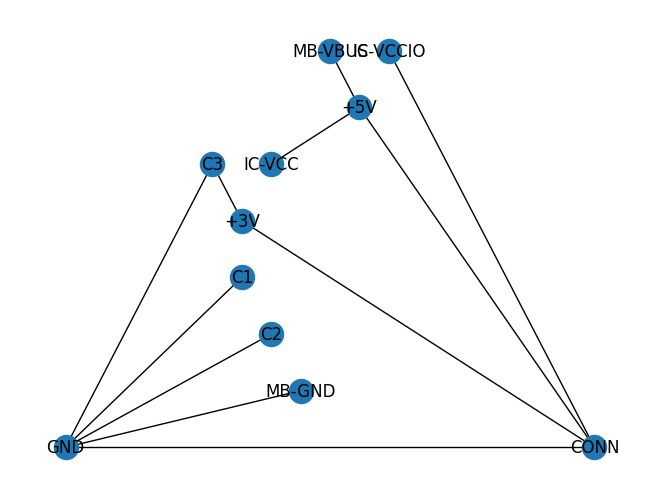

In [319]:
SIDE2 = nx.Graph()
SIDE2.add_edges_from([
    ('GND', 'CONN'),
    ('+3V', 'CONN'),
    ('+5V', 'CONN'),
    ('IC-VCCIO', 'CONN'),
    ('C1', 'GND'),
    ('C2', 'GND'),
    ('C3', 'GND'),
    ('MB-GND', 'GND'),
    ('C3', '+3V'),
    ('IC-VCC', '+5V'),
    ('MB-VBUS', '+5V'),
])
nx.draw_planar(SIDE2, with_labels=True)

False
edges: 23
vertices: 16
thick ceil:  1
thick floor:  1


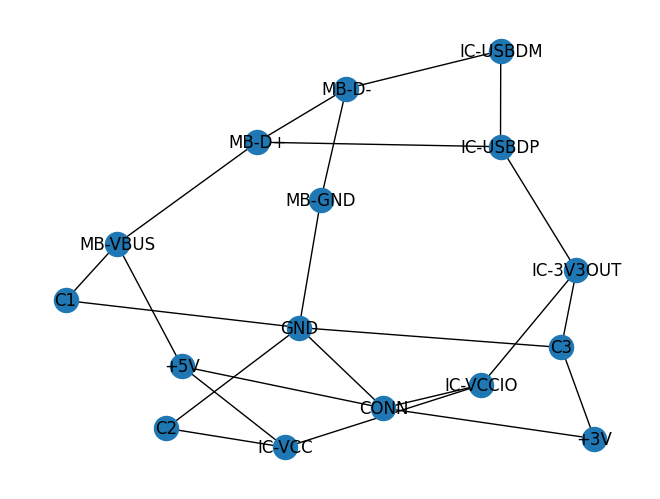

In [320]:
def thickceil(G):
    return math.ceil(len(G.edges) / (3 * len(G.nodes) - 6))

def thickfloor(G):
    m = len(G.edges)
    n = len(G.nodes)
    return math.floor((m + 3 * n)/(3 * n - 6))

CB = nx.compose(SIDE1, SIDE2)
print(nx.is_planar(CB))
print('edges:', len(CB.edges))
print('vertices:', len(CB.nodes))
print('thick ceil: ', thickceil(CB))
print('thick floor: ', thickfloor(CB))
_, counter = nx.check_planarity(CB, counterexample=True)
# nx.draw(counter, with_labels=True)
nx.draw(CB, with_labels=True)
counter = nx.contracted_nodes(counter, 'GND', 'C2', self_loops=False)
counter = nx.contracted_nodes(counter, 'GND', 'C3', self_loops=False)
counter = nx.contracted_nodes(counter, '+5V', 'MB-VBUS', self_loops=False)
counter = nx.contracted_nodes(counter, '+5V', 'MB-D+', self_loops=False)
counter = nx.contracted_nodes(counter, '+5V', 'IC-USBDP', self_loops=False)
top = nx.bipartite.sets(counter)[0]
pos = nx.bipartite_layout(counter, top)
# nx.draw(counter, pos=pos, with_labels=True)

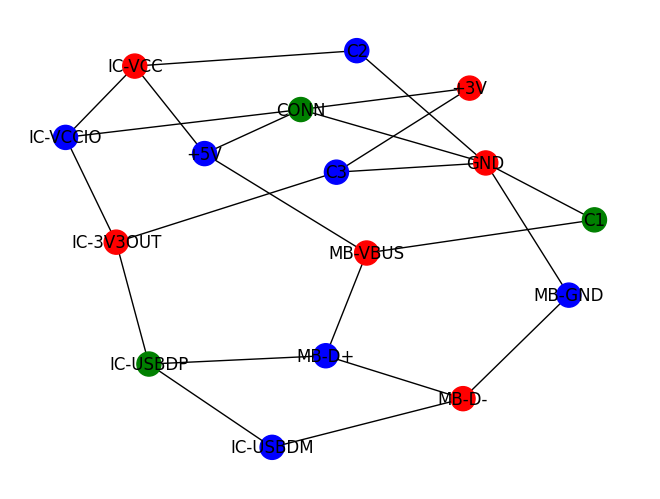

In [321]:
colors = [
    ('MB-VBUS', 'red'),
    ('MB-D+', 'blue'),
    ('MB-D-',  'red'), 
    ('MB-GND',  'blue'), 
    ('+5V',  'blue'), 
    ('+3V',  'red'),
    ('GND',  'red'),
    ('C1',  'green'),
    ('C2',  'blue'),
    ('C3',  'blue'),
    ('IC-VCC',  'red'),
    ('IC-VCCIO',  'blue'),
    ('IC-3V3OUT',  'red'),
    ('IC-USBDP',  'green'),
    ('IC-USBDM',  'blue'),
    ('CONN', 'green'),
]
nx.draw(CB, nodelist=[t[0] for t in colors], node_color=[t[1] for t in colors], with_labels=True)

{0: (10, 0), 2: (10, 20), 4: (10, 40), 6: (10, 60), 8: (10, 80), 10: (10, 100), 12: (10, 120), 14: (10, 140), 1: (20, 10), 3: (20, 30), 5: (20, 50), 7: (20, 70), 9: (20, 90), 11: (20, 110), 13: (20, 130), 15: (20, 150)}
edges: 28, vertices: 16


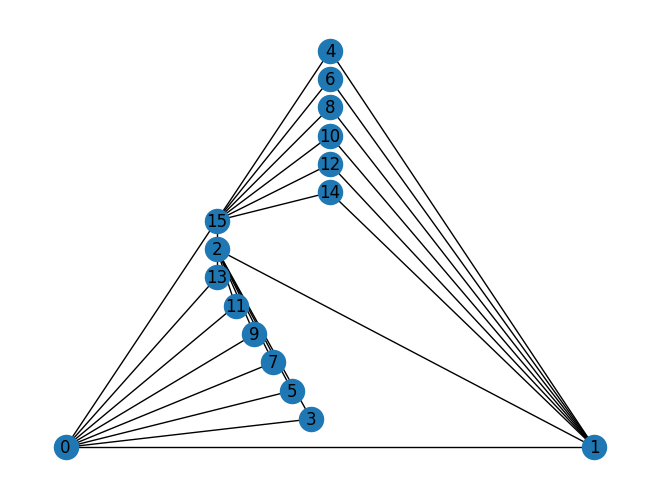

In [322]:
pos = {n: (10, 10*n) for n in range(0, 16, 2)}
pos.update({n: (20, 10*n) for n in range(1, 17, 2)})
print(pos)
K = nx.Graph()
K.add_nodes_from(range(16))
K.add_edges_from([(0, i) for i in range(1, 17, 2)])
K.add_edges_from([(2, i) for i in range(1, 17, 2)])
K.add_edges_from([(i, 15) for i in range(2, 16, 2)])
K.add_edges_from([(i, 1) for i in range(4, 16, 2)])
nx.draw_planar(K, with_labels=True)
# nx.draw(K, pos=pos, with_labels=True)
print(f'edges: {len(K.edges)}, vertices: {len(K.nodes)}')

edges: 20, vertices: 12


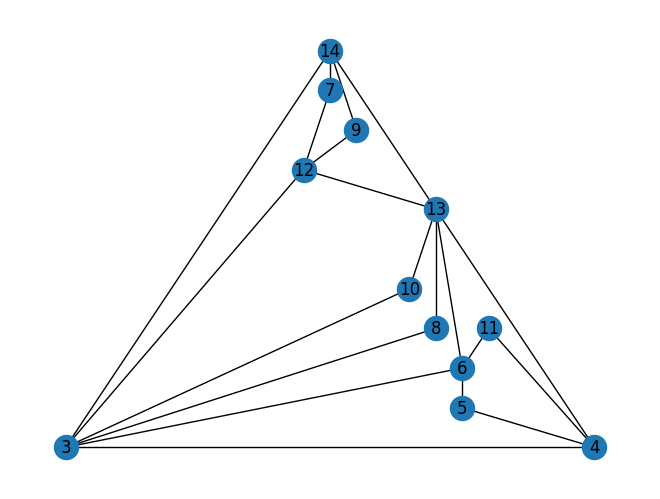

In [323]:
L = nx.Graph()
L.add_nodes_from(range(3, 15))
L.add_edges_from([(4, i) for i in range(3, 15, 2)])
L.add_edges_from([(6, i) for i in range(3, 15, 2)])
L.add_edges_from([(i, 3) for i in range(4, 16, 2)])
L.add_edges_from([(i, 13) for i in range(4, 16, 2)])
L.remove_edges_from([
    (6, 7),
    (6, 9),
])
L.remove_edges_from([
    (4, 7),
    (4, 9),
])
L.add_edges_from([
    (14, 7),
    (14, 9),
])
L.add_edges_from([
    (12, 7),
    (12, 9),
])
print(f'edges: {len(L.edges)}, vertices: {len(L.nodes)}')
nx.draw_planar(L, with_labels=True)
# nx.draw(L, pos=pos, with_labels=True)

edges: 16, vertices: 10


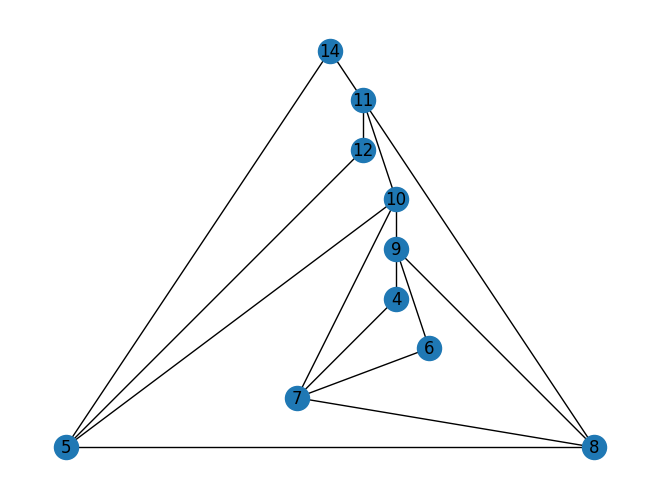

In [324]:
M = nx.Graph()
M.add_nodes_from(range(5, 15))
M.remove_nodes_from([6, 13])
M.add_edges_from([(8, i) for i in range(5, 13, 2)])
M.add_edges_from([(10, i) for i in range(5, 13, 2)])
M.add_edges_from([(i, 5) for i in range(8, 16, 2)])
M.add_edges_from([(i, 11) for i in range(8, 16, 2)])
M.add_edges_from([
    (6, 7),
    (6, 9),
])
M.add_edges_from([
    (4, 7),
    (4, 9),
])
print(f'edges: {len(M.edges)}, vertices: {len(M.nodes)}')
nx.draw_planar(M, with_labels=True)
# nx.draw(M, pos=pos, with_labels=True)

edges: 64, vertices: 16


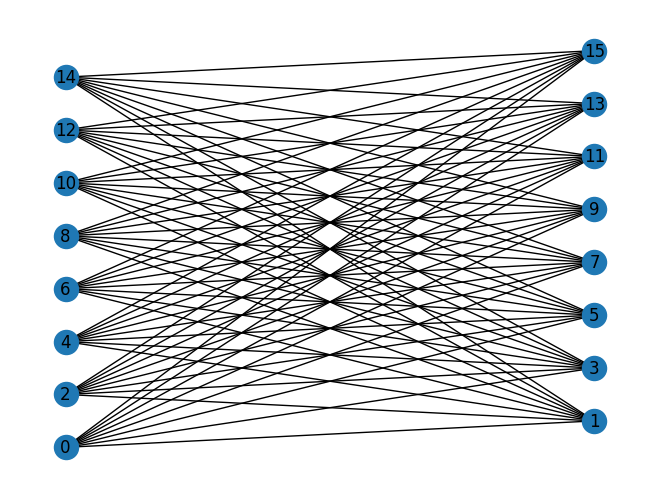

In [325]:
C = nx.compose(M, nx.compose(K, L))
print(f'edges: {len(C.edges)}, vertices: {len(C.nodes)}')
nx.draw(C, pos=pos, with_labels=True)

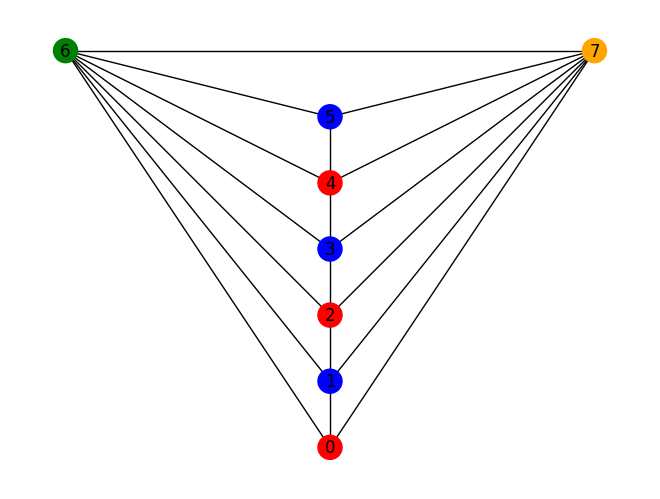

In [387]:
G = nx.Graph()
G.add_edges_from([
    (0, 1),
    (1, 2),
    (2, 3),
    (3, 4),
    (4, 5),
    (5, 6),
    (5, 7),
    (6, 7),
    (0, 6),
    (0, 7),
    (1, 6),
    (1, 7),
    (2, 6),
    (2, 7),
    (3, 6),
    (3, 7),
    (4, 6),
    (4, 7),
])
colors = [
    'red',
    'blue',
    'red',
    'blue',
    'red',
    'blue',
    'green',
    'orange',
]

pos = {n: (20, 10*n) for n in range(6)}
pos.update({6: (10, 60), 7: (30, 60)})
nx.draw(G, pos=pos, node_color=colors, with_labels=True)

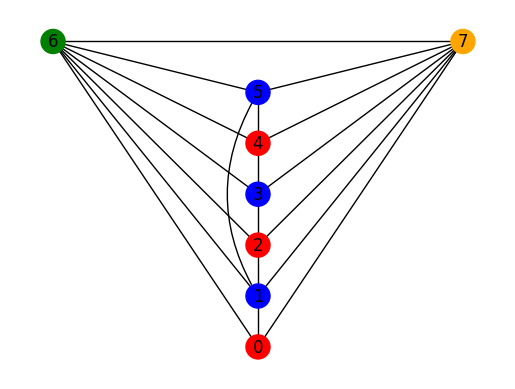

In [388]:
B = nx.MultiDiGraph()
B.add_edges_from([(5, 1)])

nx.draw_networkx_edges(
    B, pos=pos,
    arrowsize=0.1,
    connectionstyle="arc3,rad=0.3"
)
nx.draw(G, pos=pos, node_color=colors, with_labels=True)

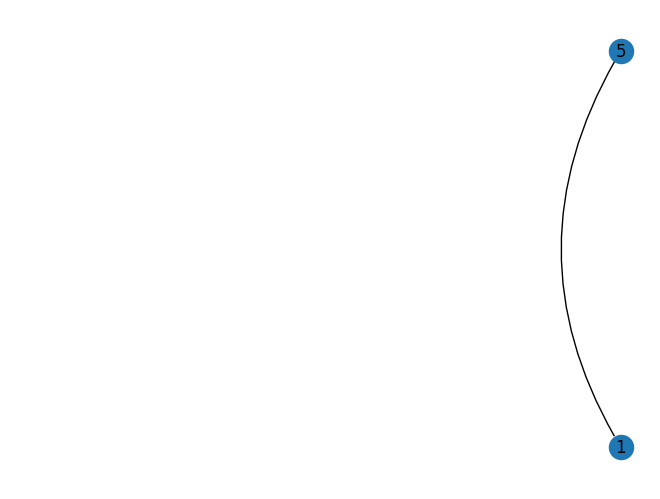

In [394]:
nx.draw(
    B, pos=pos,
    arrowsize=0.1,
    connectionstyle="arc3,rad=0.3",
    with_labels=True
)